In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# 自己回帰モデルの当てはめでは、残差がホワイトノイズになっているかが非常に重要
df_log_ret = pd.read_csv("input/data.log.return.csv")
df_log_ret.head()

,x1332,x1334,x1605,x1662,x1721,x1801,x1802,x1803,x1808,x1812,...,x9783,x9793,x9831,x9843,x9861,x9962,x9983,x9984,x9987,x9989
0,-1.197619,-0.796817,1.068386,0.478089,-1.480138,-0.896867,-0.563382,-0.763362,1.980263,-0.470589,...,0.527706,-0.330306,-1.174757,-1.809374,-0.199601,-2.037156,-2.003406,-1.755831,-2.181621,0.211491
1,-4.308359,-0.803217,0.635595,2.045705,0.279200,0.896867,1.123607,-0.383878,-1.980263,0.470589,...,-0.925321,-0.248447,-2.846634,-1.985881,0.696867,-0.794706,-1.472280,2.857337,-0.355100,-0.813156
2,-3.195160,-0.809721,0.210971,5.160477,0.925076,0.888895,-0.560226,0.383878,0.000000,1.398624,...,-0.132890,-0.749067,-4.348511,-0.863315,-0.796817,-1.933465,3.640839,0.000000,0.315707,-2.298126
3,0.000000,-0.816331,-1.593236,0.295421,1.824868,0.000000,1.671348,0.763362,0.000000,0.921666,...,-1.069529,0.250313,1.574836,0.432589,0.399202,0.702516,-0.165153,-2.055408,1.175102,0.543381
4,1.290340,0.816331,1.593236,0.147384,0.361011,0.441502,-1.111123,1.134228,0.000000,2.715099,...,1.600034,-3.908739,-1.257878,-1.741699,-0.099651,-0.269615,1.747723,-2.589141,1.775423,0.036121


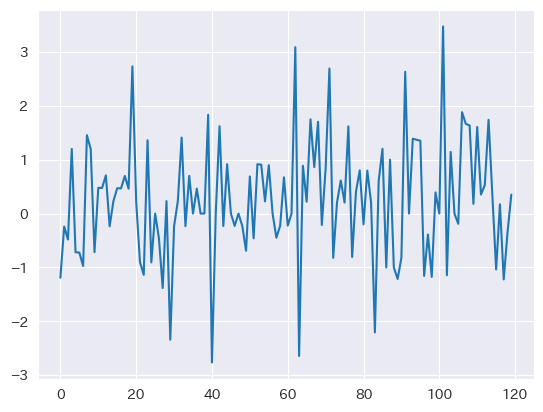

In [3]:
plt.plot(df_log_ret["x9042"])
plt.show()

In [4]:
# AR(1)_fit
import statsmodels.api as sm

model = sm.tsa.ARIMA(df_log_ret["x9042"], order=(1,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  x9042   No. Observations:                  120
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -180.095
Date:                Tue, 06 Feb 2024   AIC                            366.189
Time:                        14:00:52   BIC                            374.552
Sample:                             0   HQIC                           369.586
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2504      0.089      2.801      0.005       0.075       0.426
ar.L1         -0.1406      0.098     -1.442      0.149      -0.332       0.051
sigma2         1.1777      0.141      8.323      0.000       0.900       1.455
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.94   Prob(JB):                         0.36
Heteroskedasticity (H):               1.47   Skew:                             0.20
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
# AR-fit
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_log_ret["x9042"], lags=1)
model_fitted = model.fit()

model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  x9042   No. Observations:                  120
Model:                     AutoReg(1)   Log Likelihood                -178.212
Method:               Conditional MLE   S.D. of innovations              1.082
Date:                Tue, 06 Feb 2024   AIC                            362.423
Time:                        14:00:52   BIC                            370.760
Sample:                             1   HQIC                           365.809
                                  120                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2958      0.102      2.910      0.004       0.097       0.495
x9042.L1      -0.1397      0.090     -1.551      0.121      -0.316       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -7.1573           +0.0000j            7.1573            0.5000
-----------------------------------------------------------------------------
"""

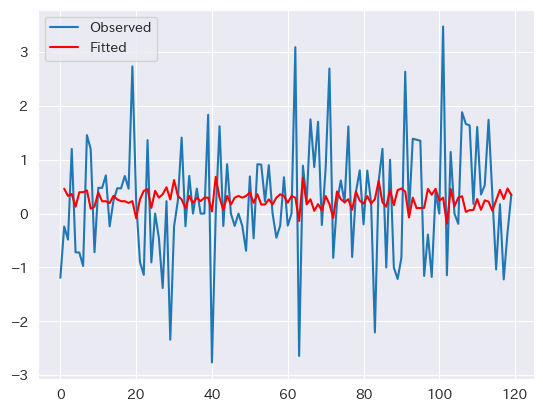

In [6]:
fig, ax = plt.subplots()
ax.plot(df_log_ret["x9042"], label="Observed")
ax.plot(model_fitted.fittedvalues, label="Fitted", color="red")
ax.legend()
plt.show()

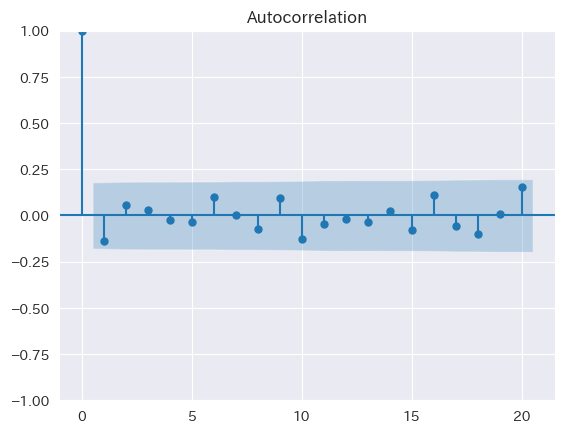

In [7]:
# コレログラム
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_log_ret["x9042"], lags=20, alpha=0.05)
plt.show()

In [8]:
# Ljung-Box
import statsmodels.api as sm
result = sm.stats.acorr_ljungbox(df_log_ret["x9042"], lags=[10])
result.head()

,lb_stat,lb_pvalue
10,8.339126,0.595749


In [9]:
# AR(1) + ARCH(1)
# p=1はARまたはARCHのラグ
# p値が小さいことをチェックする
from arch import arch_model

model = arch_model(df_log_ret["x9042"], mean="AR", lags=1, vol="ARCH",p=1)
model_fitted = model.fit()
model_fitted.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 316.20675518030004
Iteration:      2,   Func. Count:     13,   Neg. LLF: 201.37946646981828
Iteration:      3,   Func. Count:     20,   Neg. LLF: 181.02506001349883
Iteration:      4,   Func. Count:     26,   Neg. LLF: 178.26093164214717
Iteration:      5,   Func. Count:     31,   Neg. LLF: 178.33906033095732
Iteration:      6,   Func. Count:     37,   Neg. LLF: 178.34302650394469
Iteration:      7,   Func. Count:     43,   Neg. LLF: 178.21215031406246
Iteration:      8,   Func. Count:     48,   Neg. LLF: 178.21156435202593
Iteration:      9,   Func. Count:     52,   Neg. LLF: 178.21156435353484
Optimization terminated successfully    (Exit mode 0)
            Current function value: 178.21156435202593
            Iterations: 9
            Function evaluations: 52
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                  x9042   R-squared:                       0.020
Mean Model:                        AR   Adj. R-squared:                  0.011
Vol Model:                       ARCH   Log-Likelihood:               -178.212
Distribution:                  Normal   AIC:                           364.423
Method:            Maximum Likelihood   BIC:                           375.540
                                        No. Observations:                  119
Date:                Tue, Feb 06 2024   Df Residuals:                      117
Time:                        14:00:53   Df Model:                            2
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.2959  9.828e-02      3.011  2.608e-03   [  0.103,  0.488]
x9042[1]      -0.1397  8.372e-02     -1.669  9.509e-02 [ -0.304,2.435e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.1704      0.199      5.872  4.316e-09 [  0.780,  1.561]
alpha[1]   6.5520e-20  7.930e-02  8.262e-19      1.000 [ -0.155,  0.155]
========================================================================

Covariance estimator: robust
"""

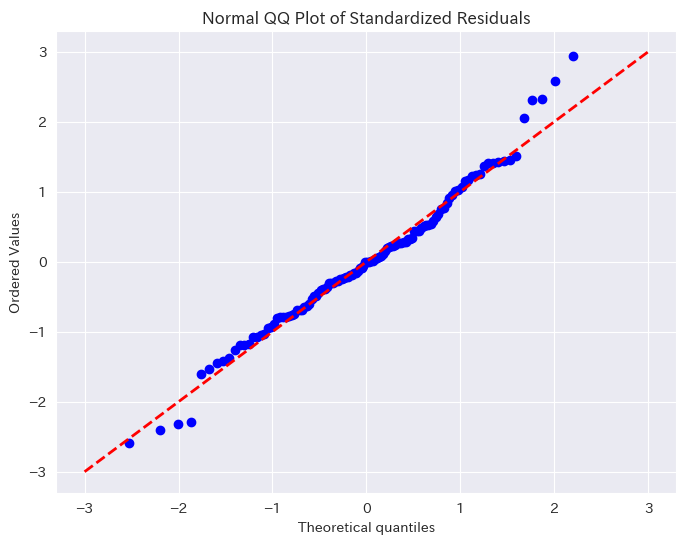

In [10]:
# 正規QQプロット
# 推定した標準化残差が仮定した分布（通常標準正規分布）に従うのが理想
import scipy.stats as stats


std_resid = model_fitted.resid / model_fitted.conditional_volatility

plt.figure(figsize=(8,6))
stats.probplot(std_resid, dist="norm", plot=plt)
plt.title("Normal QQ Plot of Standardized Residuals")
plt.plot([-3, 3], [-3, 3], 'r--', linewidth=2)
plt.show()

In [11]:
# Shapiro-Wilk正規性検定
statistic, p_value = stats.shapiro(std_resid[1:])
statistic, p_value

(0.9863242502160532, 0.2745634335442912)

In [12]:
# AR(1) + GARCH(1,1)
model = arch_model(df_log_ret["x9042"], mean="AR", lags=1, vol="GARCH",p=1, o=0, q=1)
model_fitted = model.fit()
model_fitted.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 353.00058911450486
Iteration:      2,   Func. Count:     16,   Neg. LLF: 180.07261026493214
Iteration:      3,   Func. Count:     24,   Neg. LLF: 178.1867955756292
Iteration:      4,   Func. Count:     30,   Neg. LLF: 178.20227055736143
Iteration:      5,   Func. Count:     37,   Neg. LLF: 178.1574179782947
Iteration:      6,   Func. Count:     43,   Neg. LLF: 178.11580547577995
Iteration:      7,   Func. Count:     49,   Neg. LLF: 179.2130685228075
Iteration:      8,   Func. Count:     56,   Neg. LLF: 178.89607562827763
Iteration:      9,   Func. Count:     63,   Neg. LLF: 178.50513653919995
Iteration:     10,   Func. Count:     70,   Neg. LLF: 180.48924665070123
Iteration:     11,   Func. Count:     77,   Neg. LLF: 297.89968568699055
Iteration:     12,   Func. Count:     86,   Neg. LLF: 556350240.6870537
Iteration:     13,   Func. Count:     95,   Neg. LLF: 178.17371835936416
Iteration:     14,   Func. Count:    102,   Neg. LLF: 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                  x9042   R-squared:                       0.020
Mean Model:                        AR   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:               -177.494
Distribution:                  Normal   AIC:                           364.988
Method:            Maximum Likelihood   BIC:                           378.883
                                        No. Observations:                  119
Date:                Tue, Feb 06 2024   Df Residuals:                      117
Time:                        14:00:53   Df Model:                            2
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.2768  9.758e-02      2.837  4.552e-03 [8.559e-02,  0.468]
x9042[1]      -0.1374  8.722e-02     -1.575      0.115 [ -0.308,3.358e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.9526e-03  4.347e-02      0.183      0.855 [-7.726e-02,9.316e-02]
alpha[1]       0.0000  2.609e-02      0.000      1.000 [-5.114e-02,5.114e-02]
beta[1]        0.9971  5.367e-02     18.580  4.707e-77      [  0.892,  1.102]
=============================================================================

Covariance estimator: robust
"""

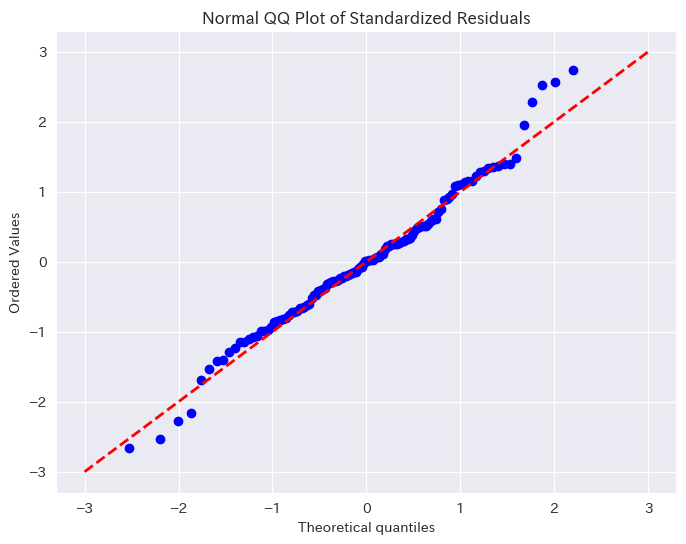

In [13]:
std_resid = model_fitted.resid / model_fitted.conditional_volatility

plt.figure(figsize=(8,6))
stats.probplot(std_resid, dist="norm", plot=plt)
plt.title("Normal QQ Plot of Standardized Residuals")
plt.plot([-3, 3], [-3, 3], 'r--', linewidth=2)
plt.show()

In [14]:
statistic, p_value = stats.shapiro(std_resid[1:])
statistic, p_value

(0.9863944718536327, 0.2784203451734902)

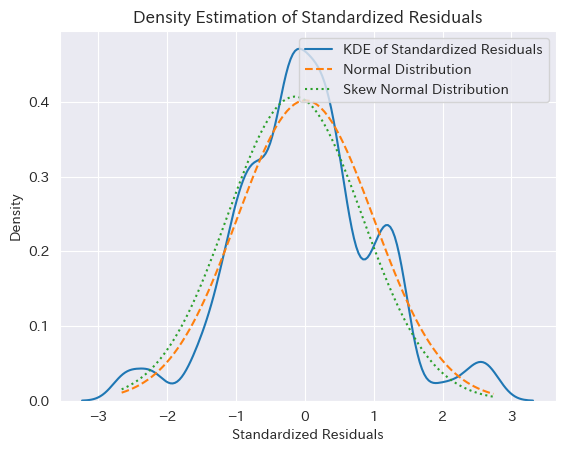

In [15]:
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm


sns.kdeplot(std_resid, bw_adjust=0.5, label="KDE of Standardized Residuals")
plt.title('Density Estimation of Standardized Residuals')
plt.xlabel('Standardized Residuals')
plt.ylabel('Density')

x = np.linspace(std_resid.min(), std_resid.max(), 100)
normal_density = stats.norm.pdf(x, np.mean(std_resid), np.std(std_resid))
plt.plot(x, normal_density, label='Normal Distribution', linestyle='--')

skew_param = -0.2
skew_normal_density = skewnorm.pdf(x, skew_param, loc=np.mean(std_resid), scale=np.std(std_resid))
plt.plot(x, skew_normal_density, label='Skew Normal Distribution', linestyle=':')

plt.legend()
plt.show()

In [16]:
from scipy.stats import skewnorm

ae, loc, scale = skewnorm.fit(model_fitted.resid[1:])
ae, loc, scale

(1.1319559092713045, -0.7866169030429262, 1.3484974950486577)

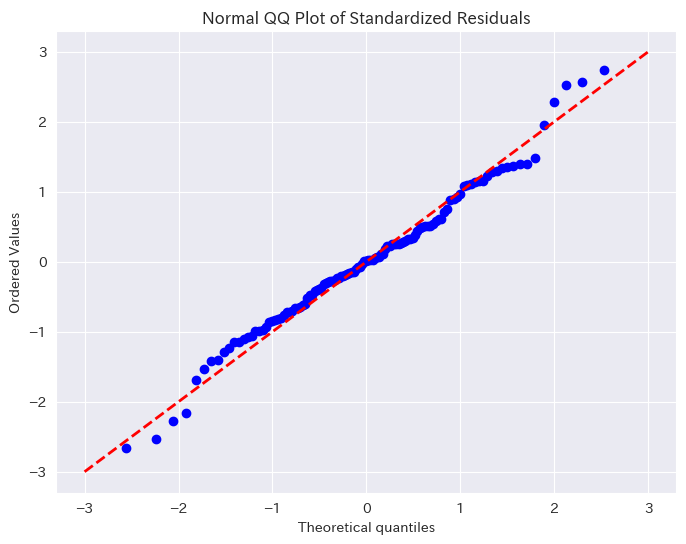

In [17]:
std_resid = model_fitted.resid / model_fitted.conditional_volatility

plt.figure(figsize=(8,6))
stats.probplot(std_resid, dist="skewnorm", plot=plt, sparams=(ae, loc, scale))
plt.title("Normal QQ Plot of Standardized Residuals")
plt.plot([-3, 3], [-3, 3], 'r--', linewidth=2)
plt.show()

In [18]:
# Kolmogorov-Smirnov検定(K-S検定)
from scipy.stats import kstest, skewnorm

ks_statistic, p_value = kstest(std_resid[1:], "skewnorm", args=(ae, loc, scale))
ks_statistic, p_value

(0.06656853724858125, 0.6426162045896373)